# Uber Ride Price Prediction

Uber is a multinational transportation network company that operates a platform connecting riders with drivers through a mobile app. It was founded in 2009 and has since become one of the most well-known examples of a ride-hailing service. Uber allows users to request a ride from their current location to a desired destination using their smartphone. The app matches the user with an available driver in the area, and the driver arrives to pick up the passenger.

Uber offers various types of services, including UberX (standard car), UberXL (larger vehicles), UberBlack (luxury vehicles), and UberPOOL (shared rides with other passengers traveling in the same direction). The fares for rides are calculated based on factors such as distance traveled, time spent on the trip, and demand at the time of the request.

__The below dataset provides information of Rides taken by people in various regions along with their start-stop timing, locations and purposes.__

Uber car refers to a vehicle that is used by drivers who are registered with the Uber platform to provide transportation services to passengers. Uber does not own the cars but rather relies on individuals who own or lease their vehicles to become Uber drivers.

__In the following analysis, we will analyse this dataset to draw various patterns according to miles, locations and timing of rides to get the predicted price for rides using Machine Learning algorithms.__

## Step1 - Data Cleaning

In [3]:
# Importing required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.graph_objects as go
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Let's have a look at our dataset

df = pd.read_csv("UberDataset.csv")
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [6]:
# Check for the null values in the dataset
df.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In the above dataset, we will follow the following steps to clean the dataset 
- 1. There is 1 null value in every column, so we have to get rid of that one entry.
- 2. The datatype of START_DATE and END_DATE is object type. We have to change the datatype to datetime format.
- 3. PURPOSE column has 503 null values, so we will manipulate the null entries.

- __Dropping null values__

In [7]:
# Let's check which row has null value in every column
df.isnull()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1151,False,False,False,False,False,False,False
1152,False,False,False,False,False,False,False
1153,False,False,False,False,False,False,False
1154,False,False,False,False,False,False,False


The last entry has null values in all columns. So, it's better to drop this row.

In [8]:
# Deleting last row which has null values in all columns
df = df[:-2]

- __Changing datatypes__

In [9]:
# Let's now change the datatype of START_DATE and END_DATE columns
df["START_DATE"] = pd.to_datetime(df["START_DATE"])
df["END_DATE"] = pd.to_datetime(df["END_DATE"])

In [10]:
# Check
df.dtypes

START_DATE    datetime64[ns]
END_DATE      datetime64[ns]
CATEGORY              object
START                 object
STOP                  object
MILES                float64
PURPOSE               object
dtype: object

- __Manipulating Null values__

In [11]:
# Check null values
df.isnull().sum()

START_DATE      0
END_DATE        0
CATEGORY        0
START           0
STOP            0
MILES           0
PURPOSE       502
dtype: int64

Let's manipulate the null values in PURPOSE column by changing them to 'OTHER'.

In [12]:
# Fill the null values in PURPOSE column by 'Other'
df["PURPOSE"].fillna("Other", inplace=True)

In [13]:
df.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

In [14]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Other
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


Now the dataset looks clean. We can move forward in our analysis.

## Step2 - Feature Engineering

Let's extract the day name from `START_DATE` column and create a new column as `DAY`

In [15]:
# Create a column 'DAY'
df['DAY'] = df['START_DATE'].dt.day_name()
df.DAY.value_counts()

Friday       206
Tuesday      176
Monday       174
Thursday     154
Saturday     149
Sunday       148
Wednesday    147
Name: DAY, dtype: int64

Let's now calculate the duration of ride. To do so, we have to substract the start time from end time.

In [16]:
# Create a 'Duration' column 
df['DURATION'] = (df['END_DATE'] - df['START_DATE']).astype('timedelta64[m]')
df.DURATION.value_counts()

6.0      51
15.0     50
10.0     50
11.0     48
7.0      46
         ..
206.0     1
71.0      1
72.0      1
143.0     1
70.0      1
Name: DURATION, Length: 99, dtype: int64

In [17]:
# Let's have a look at our data now.
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DAY,DURATION
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Friday,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Other,Saturday,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Saturday,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Tuesday,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Wednesday,67.0


## Step3 - Data Visualization

In [18]:
# Let's see the statistics
df.describe()

,MILES,DURATION
count,1154.000000,1154.000000
mean,10.534229,23.174177
std,21.559969,27.228913
min,0.500000,0.000000
25%,2.900000,10.000000
50%,6.000000,16.000000
75%,10.400000,27.000000
max,310.300000,336.000000


(array([0, 1]), [Text(0, 0, 'Business'), Text(1, 0, 'Personal')])

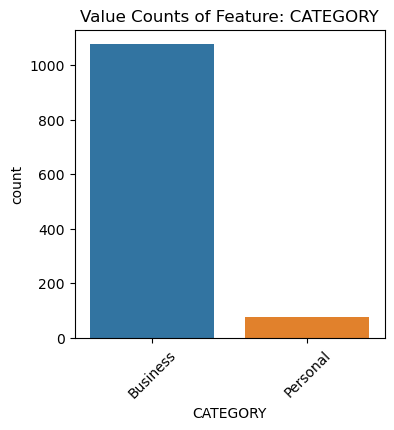

In [19]:
# Plot a countplot of categories
plt.figure(figsize=[4,4])
sns.countplot(x=df["CATEGORY"])
plt.title("Value Counts of Feature: CATEGORY")
plt.xticks(rotation=45)

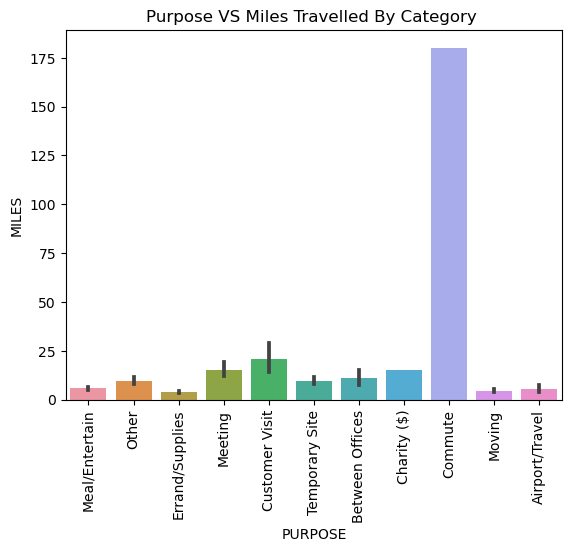

In [20]:
# Let's visualise purpose Vs miles

sns.barplot(x= df["PURPOSE"], y= df['MILES'])
plt.title("Purpose VS Miles Travelled By Category ")
plt.xticks(rotation=90)
plt.show()

The above bar graph shows that more than 75% rides are for personal commute purpose and it is difficult to understand the patterns within other ride purposes. So we can neglect this purpose for some analysis to get more clear graphs of other purposes.

In [21]:
# Create a dataframe which includes all the entries except for "Commute" purpose
df1 = df[df["PURPOSE"] != "Commute"]

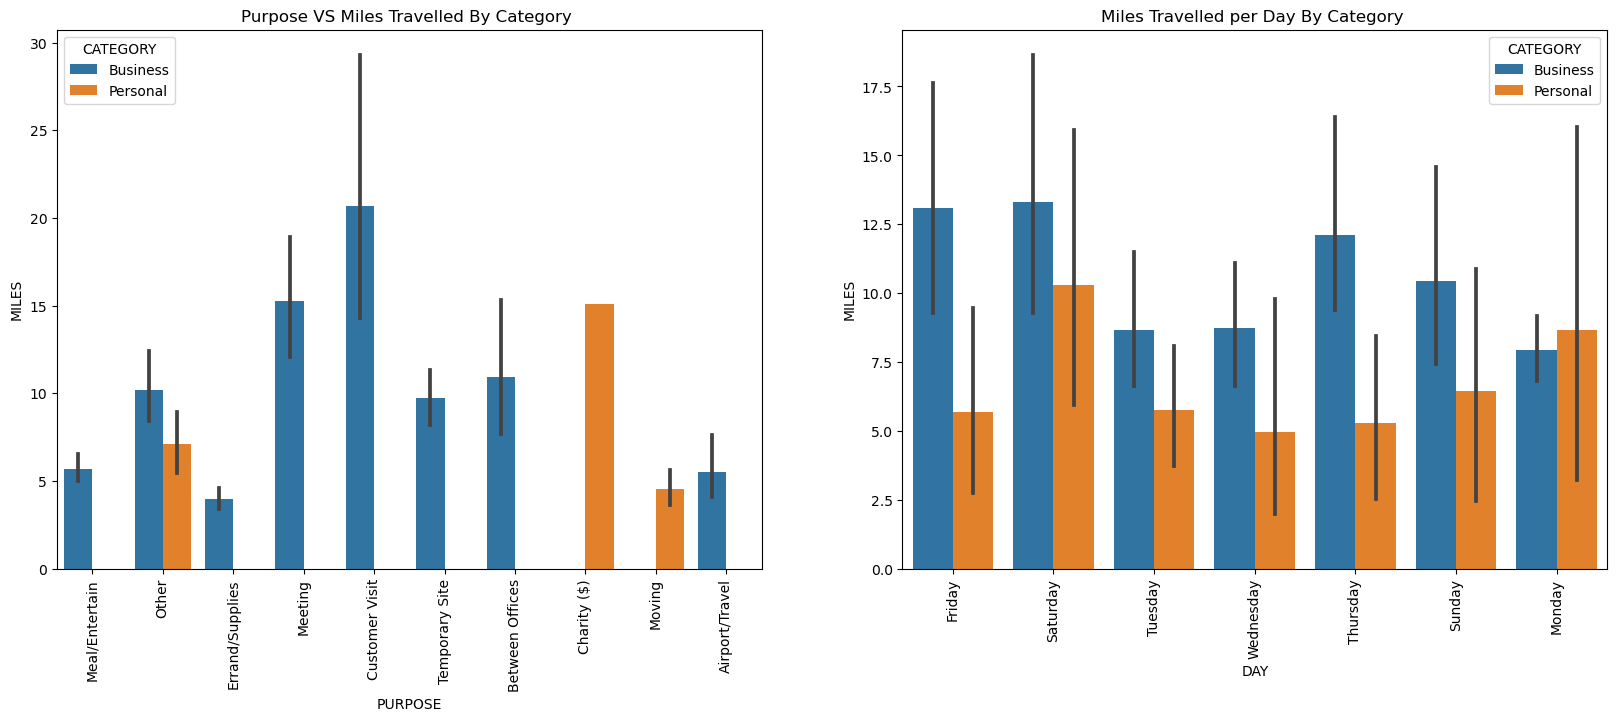

In [22]:
# Let's analyse this dataset using visuals

plt.figure(figsize=[20,7])

plt.subplot(1,2,1)
sns.barplot(x= df1["PURPOSE"], y= df1['MILES'], hue = df1["CATEGORY"])
plt.title("Purpose VS Miles Travelled By Category ")
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot(x= df1["DAY"], y= df1['MILES'], hue = df1["CATEGORY"])
plt.title("Miles Travelled per Day By Category ")
plt.xticks(rotation=90)

plt.show()

- __Personal rides are only taken for purposes like `Commute`, `Charity` and `Moving`. Maximum business rides are taken for `Customer Visit` and `Meeting` purpose.__
- __Maximum rides are taken on `Fridays` and `Saturdays` while Modt of the personal rides are taken `Saturdays`.__ 

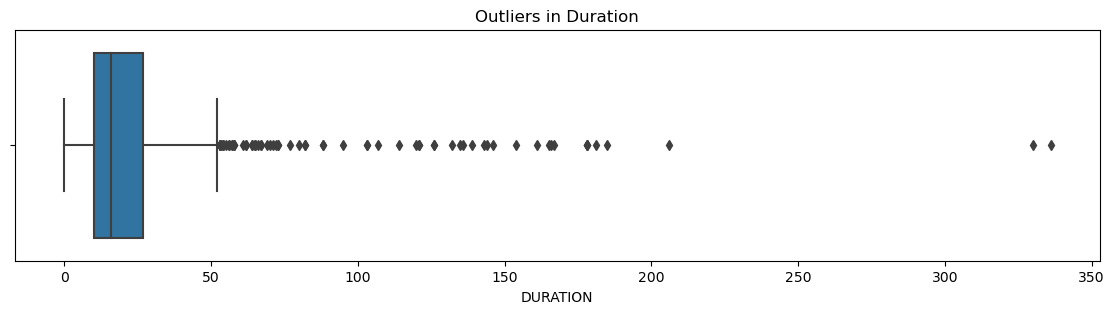

In [23]:
# Plot a boxplot of ride duration
plt.figure(figsize=[14,3])

sns.boxplot(df["DURATION"])
plt.title("Outliers in Duration")

plt.show()

- __Most of the rides duration is between 10 to 30 minutes__

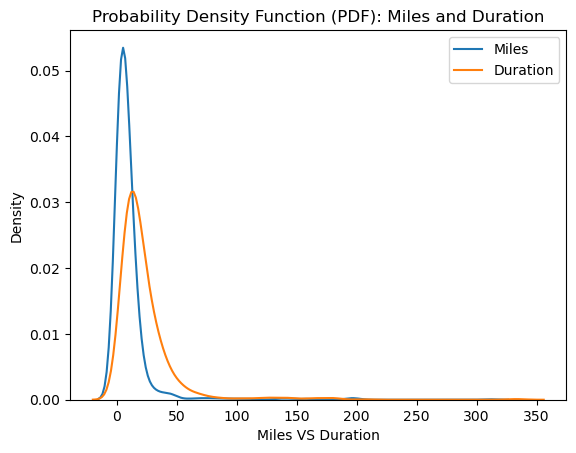

In [24]:
# Let's visualize Miles VS Duration
sns.distplot(df["MILES"],hist = False,label="Miles")
sns.distplot(df["DURATION"],hist = False, label="Duration")
plt.title("Probability Density Function (PDF): Miles and Duration")
plt.xlabel("Miles VS Duration")
plt.legend()
plt.show()

## Step4 - Encoding  🔢

In [25]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DAY,DURATION
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Friday,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Other,Saturday,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Saturday,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Tuesday,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Wednesday,67.0


- __Dummy variables__

In [26]:
# Using pandas to encode featuers 
df_encoded = pd.get_dummies(df, columns=['CATEGORY', 'START',"PURPOSE", 'STOP', 'DAY'])
df_encoded.head()

,START_DATE,END_DATE,MILES,DURATION,CATEGORY_Business,CATEGORY_Personal,START_Agnew,START_Almond,START_Apex,START_Arabi,...,STOP_Whitebridge,STOP_Williamsburg Manor,STOP_Winston Salem,DAY_Friday,DAY_Monday,DAY_Saturday,DAY_Sunday,DAY_Thursday,DAY_Tuesday,DAY_Wednesday
0,2016-01-01 21:11:00,2016-01-01 21:17:00,5.1,6.0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,5.0,12.0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,4.8,13.0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,4.7,14.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,63.7,67.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [27]:
# Spliting Data into Train and Test
from sklearn.model_selection import train_test_split
X = df_encoded.drop(['MILES',"START_DATE","END_DATE"], axis=1) 
y = df_encoded['MILES']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Step5 - Models Training 🚀

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor ,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR,LinearSVR
from sklearn.neighbors import KNeighborsRegressor

In this section, we will train and evaluate various models for our dataset. Let's explore different machine learning algorithms to find the best model for our task. Here are the models we will be considering:
- Linear Regression 📈
- Decision Tree 🌳
- Random Forest 🌿
- Support Vector Regression (SVR) 📊
- XGBoost 🚀
- LightGBM ☀️
- Gradient Boosting Regressor 📈
- ADA Boost 🎢
- Linear SVR 📉
- KNN Regressor 📏
- Cat Boost Regressor 🐱

We will train each model on our training data and evaluate their performance using appropriate metrics such as mean squared error (MSE) and R-squared score. Additionally, we will generate plots to compare the actual trend with the predicted trend for each model.

Let's get started and see which model performs the best on our dataset! 🏆

In [33]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR(),
    'Gradient Boosting Regressor' : GradientBoostingRegressor(),
    'ADA Boost' : AdaBoostRegressor(),
    'Linear SVR' : LinearSVR(),
    'KNN Regressor' : KNeighborsRegressor()
}

In [34]:
accuracy = {}
predictions = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred


## Step6 - Model Evaluation and Graphs 📊📈

Results for Linear Regression:
Mean Squared Error: 2.0080508676236034e+22
R-squared Score: -4.549597494159727e+19


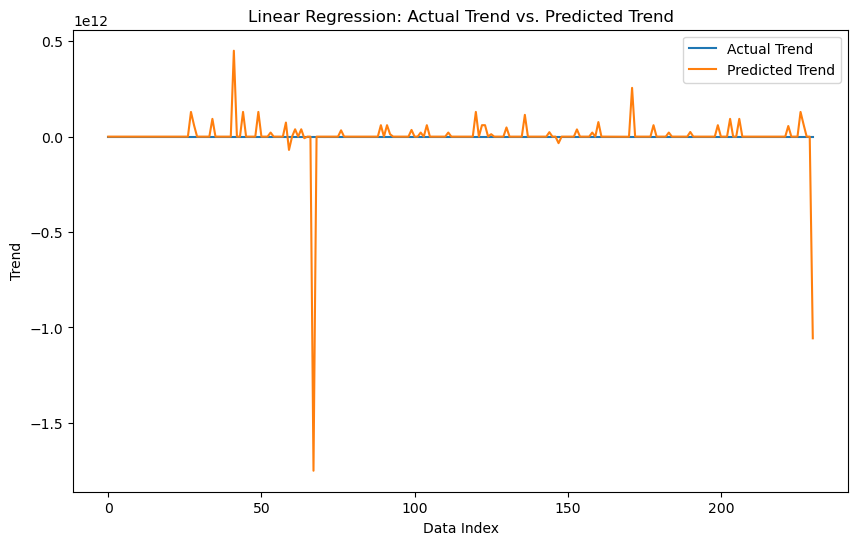


Results for Decision Tree:
Mean Squared Error: 256.6160281385281
R-squared Score: 0.41859060574400253


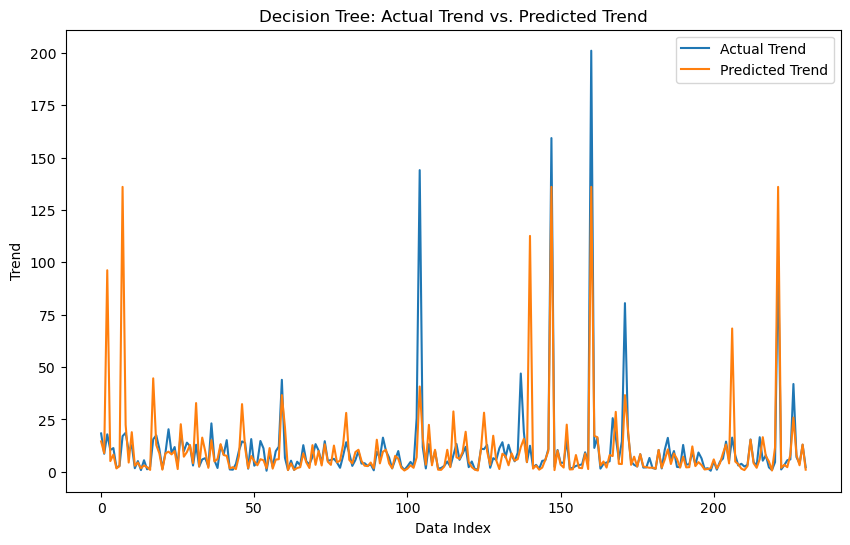


Results for Random Forest:
Mean Squared Error: 181.13342540286257
R-squared Score: 0.5896099089876736


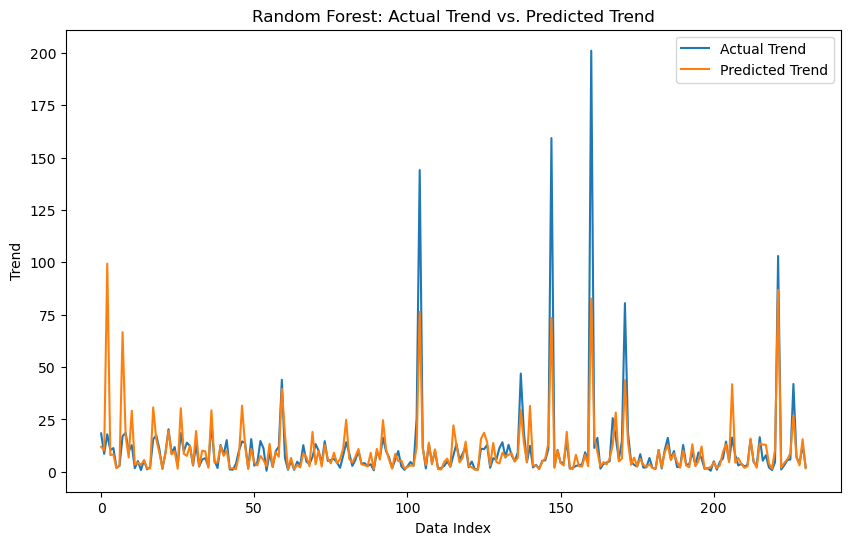


Results for SVR:
Mean Squared Error: 329.65057008832986
R-squared Score: 0.2531178209658208


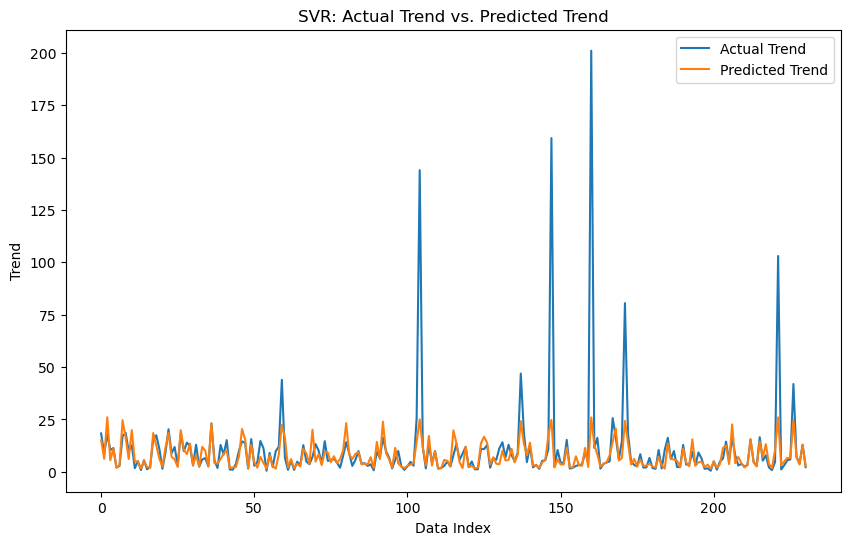


Results for Gradient Boosting Regressor:
Mean Squared Error: 152.59112019757788
R-squared Score: 0.6542775936231637


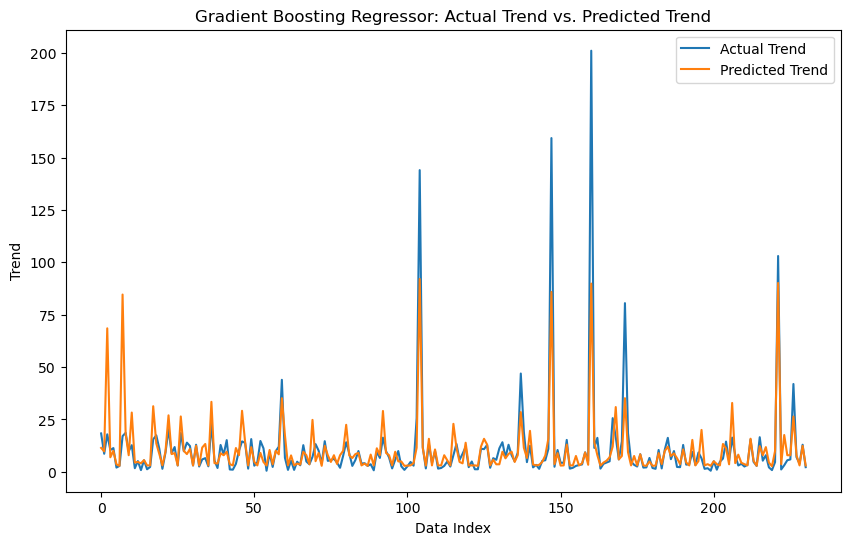


Results for ADA Boost:
Mean Squared Error: 204.650965683039
R-squared Score: 0.5363267257513282


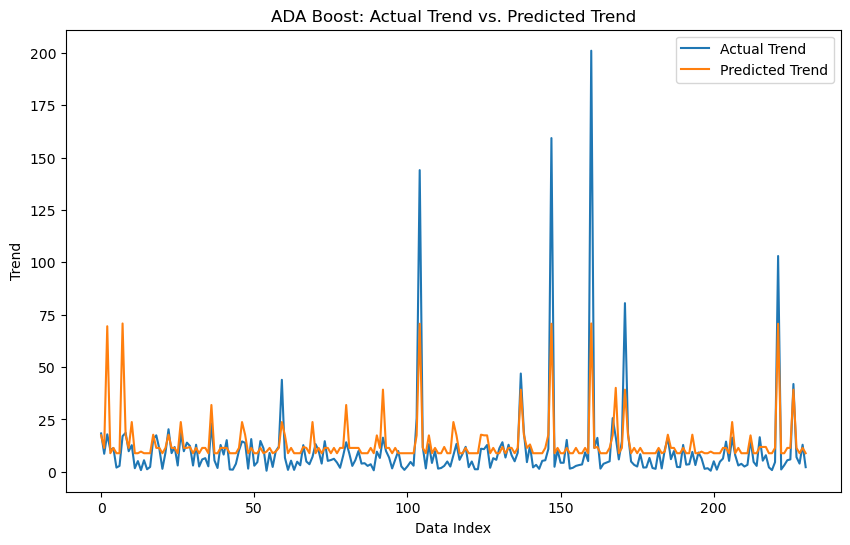


Results for Linear SVR:
Mean Squared Error: 198.4835893460271
R-squared Score: 0.550300017155851


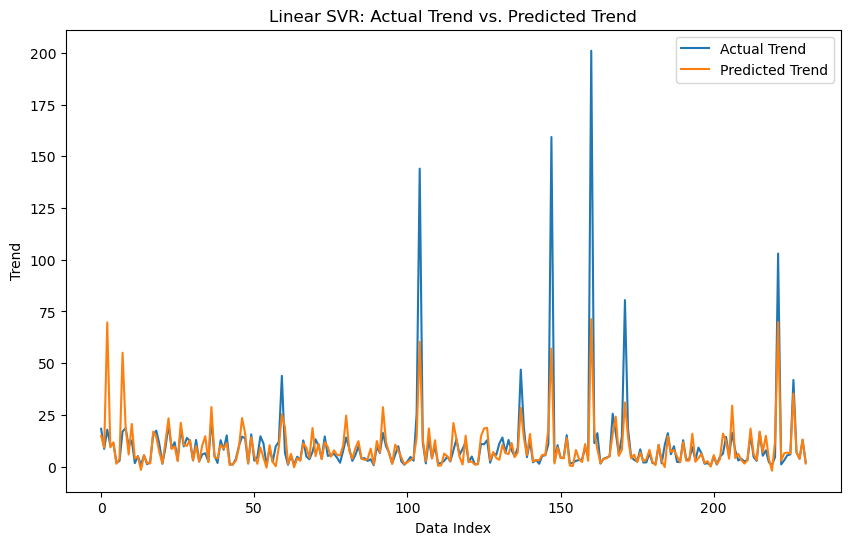


Results for KNN Regressor:
Mean Squared Error: 178.97764155844158
R-squared Score: 0.5944942218976026


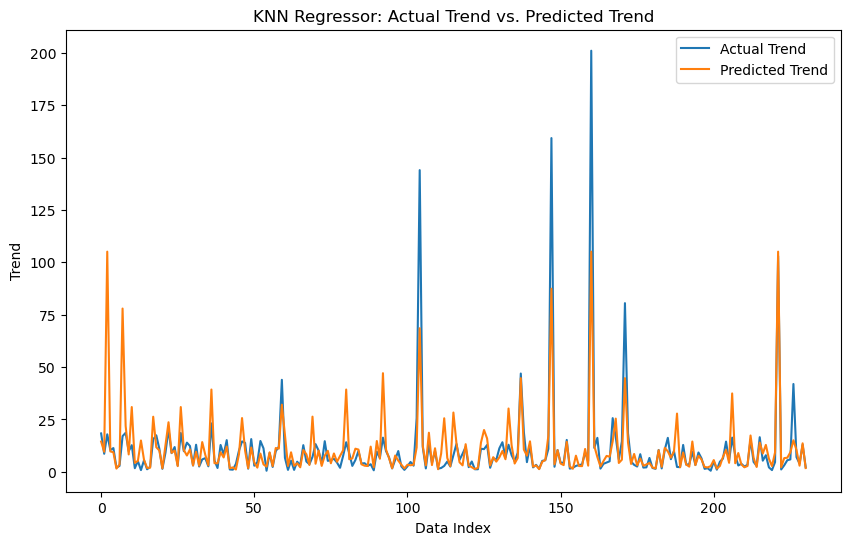

In [35]:
for name, y_pred in predictions.items():
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    accuracy[name] = r2
    
    print(f"Results for {name}:")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared Score: {r2}")
    
    plt.figure(figsize=(10, 6))
    plt.plot(np.arange(len(y_test)), y_test, label='Actual Trend')
    plt.plot(np.arange(len(y_test)), y_pred, label='Predicted Trend')
    plt.xlabel('Data Index')
    plt.ylabel('Trend')
    plt.title(f'{name}: Actual Trend vs. Predicted Trend')
    plt.legend()
    plt.show()
    print()

In [36]:
accuracy_df = pd.DataFrame({'Model': list(accuracy.keys()), 'Accuracy Score': list(accuracy.values())})
accuracy_df

,Model,Accuracy Score
0,Linear Regression,-4.549597e+19
1,Decision Tree,4.185906e-01
2,Random Forest,5.896099e-01
3,SVR,2.531178e-01
4,Gradient Boosting Regressor,6.542776e-01
5,ADA Boost,5.363267e-01
6,Linear SVR,5.503000e-01
7,KNN Regressor,5.944942e-01
